In [2]:
import pandas as pd
ppg_data = pd.read_csv("/Users/jingyan/Desktop/capstone/CMU_resample.csv")
features=ppg_data.iloc[:,1:-1]
label = ppg_data.iloc[:,-1]

In [3]:
import numpy as np
labels = np.array(label)
feature_list = list(features.columns)
features = np.array(features)

In [4]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 42)

In [5]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_features, train_labels = smt.fit_sample(train_features, train_labels)

In [92]:
# n_estimators = [100, 300, 500, 800, 1200]
# max_depth = [5, 8, 15, 25, 30]
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10] 

# rf = RandomForestClassifier()

# hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
#               min_samples_split = min_samples_split, 
#              min_samples_leaf = min_samples_leaf)

# gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, 
#                       n_jobs = -1)
# bestF = gridF.fit(train_features, train_labels)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 23.2min finished


In [6]:
gridF.best_params_

NameError: name 'gridF' is not defined

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, max_depth=25,
 min_samples_leaf =1, min_samples_split=2)

rf.fit(train_features, train_labels)

RandomForestClassifier(max_depth=25)

In [12]:
print(rf.feature_importances_)

[0.39179845 0.25563638 0.18521829 0.16734688]


In [9]:
predictions = rf.predict(test_features)

In [10]:
from sklearn.metrics import accuracy_score,recall_score,classification_report
print(accuracy_score(test_labels, predictions))
print(recall_score(test_labels, predictions))

0.9098039215686274
0.2903225806451613


In [11]:
print(classification_report(test_labels, predictions, target_names =['No default', 'Default'], digits = 4))

              precision    recall  f1-score   support

  No default     0.9539    0.9499    0.9519       479
     Default     0.2727    0.2903    0.2812        31

    accuracy                         0.9098       510
   macro avg     0.6133    0.6201    0.6166       510
weighted avg     0.9125    0.9098    0.9111       510



Text(0.5, 0, 'False Positive Rate')

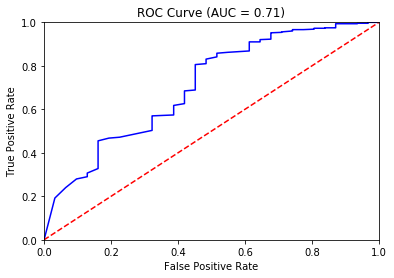

In [120]:
fpr, tpr, thresholds = roc_curve(test_labels, probas[:,0], pos_label=0)
plt.title("ROC Curve (AUC = %0.2f)"% auc(fpr, tpr))
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1]); plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')